# Hand-written Digit Recognition


*   https://stackoverflow.com/questions/62247234/wrong-contours-and-wrong-output-of-handwritten-digit-recognition-ai-model
*   https://python.hotexamples.com/examples/imutils.contours/-/sort_contours/python-sort_contours-function-examples.html
*   https://github.com/PyImageSearch/imutils/blob/master/demos/sorting_contours.py  





## Setup

In [ ]:
# import necessary dependencies
import os
import numpy as np
import cv2
import imutils
from imutils import contours
from google.colab.patches import cv2_imshow

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# to make this notebook's output stable across runs
np.random.seed(42)

## Train algorithm

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame = False)
mnist.target = mnist.target.astype(np.uint8) # uint8 data type

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size = 10000, random_state = 42)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# training the classifier
nn_clr = MLPClassifier(random_state=42)
nn_clr.fit(x_train, y_train)

MLPClassifier(random_state=42)

In [ ]:
y_pred_nn = nn_clr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_nn))

0.9625


## Image Processing

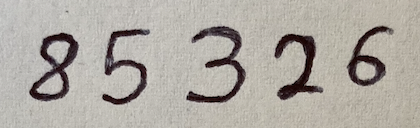

In [ ]:
# load image 
orig = cv2.imread("Test_Images/testImage3.png") 
img = orig.copy()

# view image
cv2_imshow(img)

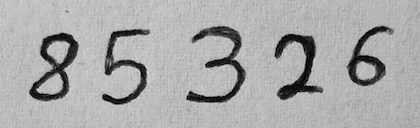

In [ ]:
# gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check it
cv2_imshow(gray)

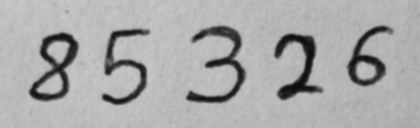

In [ ]:
# blur 
blurred = cv2.GaussianBlur(gray, (5, 5), 0) # Gaussian blurring with a 5×5 kernel to reduce high-frequency noise

# check it
cv2_imshow(blurred)

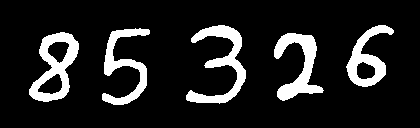

In [ ]:
# thresh
ret, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)

# check it 
cv2_imshow(thresh)

## Image Segmentation

In [ ]:
# find contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) #or try cv2.CHAIN_APPROX_SIMPLE
cnts = imutils.grab_contours(cnts)

In [ ]:
# sort the contours from left-to-right
(cnts, _) = contours.sort_contours(cnts, method = "left-to-right")

In [ ]:
# initialize list of digit arrays
digits = []
for c in cnts:
   x,y,w,h = cv2.boundingRect(c) # extract bounding rectangle points for each digit contour
   cv2.rectangle(orig, # image
                 (x, y), # start point
                 (x+w, y+h), # end point 
                 (0, 255, 0), # color (green)
                 2) # thickness
   digit = thresh[y:y+h, x:x+w] # threshold the digit
   padded_digit = np.pad(array = digit, 
                         pad_width = ((10,10), (10,10)), # add padding around digit array
                         mode = "constant", 
                         constant_values = 0)
   digit = cv2.resize(src = padded_digit, 
                      dsize = (28,28)) # desired size of the output image, given as tuple
   digits.append(digit) # creates a list of digit arrays 

In [ ]:
# display first digit
cv2_imshow(digits[0])


In [ ]:
digits = np.array(digits) # convert list of digits to np.array # not exactly sure why this is critical, but it is

In [ ]:
digits = digits.reshape(digits.shape[0], # length remains equal to the number of digits
                        digits.shape[1]*digits.shape[2]) # the new size is the heighth x width of the digit images (28 x 28 = 784)

## Let's try it out!

In [ ]:
y_pred = nn_clr.predict(digits)

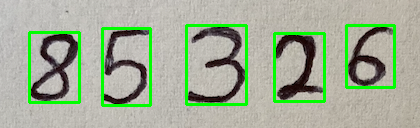

In [ ]:
cv2_imshow(orig)

In [ ]:
y_pred

array([8, 5, 3, 2, 6], dtype=uint8)